# Project: Instance-Based (Support Vector Machine (SVM))
## Name:
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - You will be provided guided questions in a separate assignment vs. here in the code to give you the opportunity to demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [1]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# The Dataset

In [2]:
# Load the Parkinson's Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Data Preprocessing

In [3]:
#Insert Code Here

print(df.shape)
print(df.columns)
print(df.describe())


(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP  

In [4]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [5]:
X = df.drop(columns=['name', 'status'])
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# Building the SVM Model

In [6]:
#Insert Code Here
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # try kernel='linear' too
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)


# Evaluating the Model

In [7]:
#Insert Code Here


print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall   :", round(recall_score(y_test, y_pred), 3))
print("F1 Score :", round(f1_score(y_test, y_pred), 3))

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


Accuracy : 0.923
Precision: 0.906
Recall   : 1.0
F1 Score : 0.951

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.700     0.824        10
           1      0.906     1.000     0.951        29

    accuracy                          0.923        39
   macro avg      0.953     0.850     0.887        39
weighted avg      0.930     0.923     0.918        39



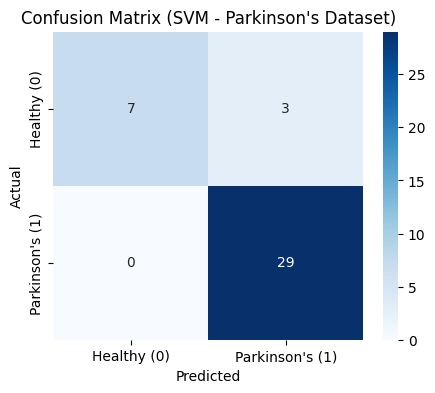

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy (0)", "Parkinson's (1)"],
            yticklabels=["Healthy (0)", "Parkinson's (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM - Parkinson's Dataset)")
plt.show()

## For the Model Selection Project, you will STOP HERE! 
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [9]:
#Insert Code Here

# Evaluating the Tuned Model (Completed in Unit 4)

In [10]:
#Insert Code Here

# Visualizing Results (Completed in Units 4 and 6)

In [11]:
#Insert Code Here